# **CNN Model For Early Detection of Sepsis**

**Mounting Drive to the Content Folder**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


**Import Required Libraries**

In [0]:
#Importing Libraries
import numpy as np
import pandas as pd

**Load the dataset "Patient.csv" from drive**

In [0]:
dataset=pd.read_csv('/content/drive/My Drive/patient.csv')

The dataset consists of clinical data of 40336 patients.
For each patient hourly clinical data is given.
The dataset is made each and patient Clinical data separated by Patient ID
It consists of 42 Coloumns
We need to predict whther the patient is diagnosed with sepsis i.e 'Sepsis Label'
Sepsis Label is given as 0 for not diagnosed with 

1.   0 for not diagnosed with Sepsis
2.   1 for diagnosed with Sepsis

In [4]:
#View The dataset
dataset.head(5)

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_Id
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.33,1,1.0,0.0,-663.55,1,0,0
1,106.0,98.0,NaN,141.0,102.33,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.33,1,1.0,0.0,-663.55,2,0,0
2,109.0,94.0,NaN,144.0,82.00,NaN,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.33,1,1.0,0.0,-663.55,3,0,0
3,102.0,94.0,36.89,124.0,78.67,NaN,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.33,1,1.0,0.0,-663.55,4,0,0
4,95.0,97.0,NaN,120.0,73.33,NaN,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.33,1,1.0,0.0,-663.55,5,0,0


In [5]:
dataset.shape

(1552210, 42)

In [6]:
dataset.size

65192820

**Preparing Patient wise data**

In [0]:
#Separating Patient ID,Sepsis Label form all the data 
features=dataset.drop(['SepsisLabel','Patient_Id'],axis=1)

In [8]:
features.head(5)

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.33,1,1.0,0.0,-663.55,1
1,106.0,98.0,NaN,141.0,102.33,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.33,1,1.0,0.0,-663.55,2
2,109.0,94.0,NaN,144.0,82.00,NaN,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.33,1,1.0,0.0,-663.55,3
3,102.0,94.0,36.89,124.0,78.67,NaN,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.33,1,1.0,0.0,-663.55,4
4,95.0,97.0,NaN,120.0,73.33,NaN,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.33,1,1.0,0.0,-663.55,5


In [9]:
features.shape

(1552210, 40)

In [10]:
features.size

62088400

In [0]:
#Finding the percentage of missing data from each Column
missing=features.isnull().sum()*100/1552210

In [12]:
missing

HR                   9.882619
O2Sat               13.061119
Temp                66.162697
SBP                 14.576958
MAP                 12.451279
DBP                 31.345887
Resp                15.354559
EtCO2               96.286843
BaseExcess          94.579020
HCO3                95.810618
FiO2                91.665754
pH                  93.069688
PaCO2               94.440121
SaO2                96.549372
AST                 98.377604
BUN                 93.134434
Alkalinephos        98.393194
Calcium             94.116067
Chloride            95.460279
Creatinine          93.904433
Bilirubin_direct    99.807371
Glucose             82.894325
Lactate             97.329872
Magnesium           93.689578
Phosphate           95.986303
Potassium           90.689082
Bilirubin_total     98.509158
TroponinI           99.047745
Hct                 91.145979
Hgb                 92.617558
PTT                 97.055875
WBC                 93.593199
Fibrinogen          99.340167
Platelets 

In [0]:
cols=list(missing[missing<90].index)

In [0]:
#Dropping all the columns from features data which are 90% missing
features=dataset[cols]

In [15]:
features.head(5)

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,Glucose,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.33,1,1.0,0.0,-663.55,1
1,106.0,98.0,NaN,141.0,102.33,NaN,24.0,NaN,66.33,1,1.0,0.0,-663.55,2
2,109.0,94.0,NaN,144.0,82.00,NaN,23.0,NaN,66.33,1,1.0,0.0,-663.55,3
3,102.0,94.0,36.89,124.0,78.67,NaN,22.0,NaN,66.33,1,1.0,0.0,-663.55,4
4,95.0,97.0,NaN,120.0,73.33,NaN,21.0,NaN,66.33,1,1.0,0.0,-663.55,5


In [16]:
features.shape

(1552210, 14)

In [17]:
features.size

21730940

In [0]:
#Dropping HospAdmTime and ICULOS
features=features.drop(['HospAdmTime','ICULOS'],axis=1)

In [0]:
#Filling the data with mean
features=features.fillna(features.mean())

In [20]:
features.head(5)

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,Glucose,Age,Gender,Unit1,Unit2
0,84.581443,97.193955,36.977228,123.750465,82.4001,63.830556,18.726498,136.932283,66.33,1,1.0,0.0
1,106.000000,98.000000,36.977228,141.000000,102.3300,63.830556,24.000000,136.932283,66.33,1,1.0,0.0
2,109.000000,94.000000,36.977228,144.000000,82.0000,63.830556,23.000000,136.932283,66.33,1,1.0,0.0
3,102.000000,94.000000,36.890000,124.000000,78.6700,63.830556,22.000000,136.932283,66.33,1,1.0,0.0
4,95.000000,97.000000,36.977228,120.000000,73.3300,63.830556,21.000000,136.932283,66.33,1,1.0,0.0


In [0]:
#Converting the DataFrame to array
featurearr=features.iloc[:,:].values

In [0]:
label=dataset[['SepsisLabel',"Patient_Id"]]

In [23]:
label.shape

(1552210, 2)

In [24]:
featurearr.shape

(1552210, 12)

In [0]:
yarr=label.iloc[:].values

In [0]:
patientid=dataset['Patient_Id'].values.tolist()

In [0]:
#Appending Hourly data of each patient to single row
c=0
ip=[]
yp=[]
seq=[]
index=0
for i in range(len(patientid)):
  if i==0:
    seq+=featurearr[index].tolist()
    index+=1
    continue
  if patientid[i]!=patientid[i-1]:
    ip.append(seq)
    yp+=[yarr[i-1,0]]
    seq=[]
  if yarr[i,0]==0:
    seq+=featurearr[index].tolist()
  elif yarr[i,0]==1 and patientid[i-1]!=patientid[i]:
    seq+=featurearr[index].tolist()
  index+=1
ip.append(seq)
yp+=[yarr[i-1,0]]

In [28]:
m=0
for i in yp:
    if i==1:
        m+=1
print('Number of Patients Diagnosed With Sepsis is ',m)

Number of Patients Diagnosed With Sepsis is  2932


In [29]:
max=0
for i in ip:
    if max<len(i):
        max=len(i)
print('Max length of row',max) #No Of Hours for each patient are not same

Max length of row 4032


In [0]:
#Feature Data
x=np.array(ip)

In [0]:
#Labels
y=np.array(yp)

In [0]:
#Making the data Categorical data
from keras.utils import to_categorical
y=to_categorical(y)

In [0]:
from keras.preprocessing import sequence
#No Of Hours for each patient are not same.So we pad zeros in the beginning
x = sequence.pad_sequences(x, maxlen=4032)

In [44]:
x.shape

(40336, 4032)

**Splitting Data Using for training and testing**

In [0]:
#Spliiting data set in ratio 6:4 for training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=0)

In [46]:
print('Training Set:')
print('Features',x_train.shape,'\nLabel',y_train.shape)
print('Testing Set:')
print('Features',x_test.shape,'\nLabel',y_test.shape)


Training Set:
Features (24201, 4032) 
Label (24201, 2)
Testing Set:
Features (16135, 4032) 
Label (16135, 2)


**Preparing the model**

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from keras.layers import LSTM
from keras.layers.embeddings import Embedding

In [48]:
embedding_vecor_length = 32
model1 = Sequential()
model1.add(Embedding(1000, embedding_vecor_length, input_length=4032))
model1.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dense(2, activation='softmax'))
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model1.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 4032, 32)          32000     
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 4032, 64)          6208      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 2016, 64)          0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 2016, 64)          12352     
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 1008, 64)          0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 1008, 64)          12352     
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 504, 64)          

**Training the model with train data**

In [49]:
#training the model
model1.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=128)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 24201 samples, validate on 16135 samples
Epoch 1/10
24201/24201 [==============================] - 378s 16ms/step - loss: 0.1636 - accuracy: 0.9539 - val_loss: 0.1350 - val_accuracy: 0.9637
Epoch 2/10
24201/24201 [==============================] - 374s 15ms/step - loss: 0.1351 - accuracy: 0.9632 - val_loss: 0.1314 - val_accuracy: 0.9636
Epoch 3/10
24201/24201 [==============================] - 371s 15ms/step - loss: 0.1260 - accuracy: 0.9643 - val_loss: 0.1275 - val_accuracy: 0.9642
Epoch 4/10
24201/24201 [==============================] - 371s 15ms/step - loss: 0.1194 - accuracy: 0.9662 - val_loss: 0.1298 - val_accuracy: 0.9642
Epoch 5/10
24201/24201 [==============================] - 376s 16ms/step - loss: 0.1119 - accuracy: 0.9671 - val_loss: 0.1302 - val_accuracy: 0.9645
Epoch 6/10
24201/24201 [==============================] - 382s 16ms/step - loss: 0.1024 - accuracy: 0.9676 - val_loss: 0.1648 - val_accuracy: 0.9643
Epoch 7/10
24201/24201 [==============================] 

**Predict the test data using trained model**

In [0]:
y_pred=model1.predict(x_test)

In [51]:
y_pred

array([[9.99992013e-01, 8.02134491e-06],
       [9.99999881e-01, 1.10969602e-07],
       [9.99987125e-01, 1.29156597e-05],
       ...,
       [9.88345861e-01, 1.16541255e-02],
       [9.99996781e-01, 3.21887364e-06],
       [9.99934912e-01, 6.50296497e-05]], dtype=float32)

In [52]:
y_pred.shape

(16135, 2)

In [0]:
y_pred1=np.round(y_pred)

In [0]:
ypred=[]
for i in y_pred1:
  if i[0]==0:
    ypred.append(1)
  else:
    ypred.append(0)

In [0]:
ytest=[]
for i in y_test:
  if i[0]==0:
    ytest.append(1)
  else:
    ytest.append(0)

**Accuracy Score**

In [56]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,ypred)

0.9587852494577006

**Confusion Matrix**

In [57]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest,ypred)
cm

array([[14737,   245],
       [  420,   733]])

**HeatMap**

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


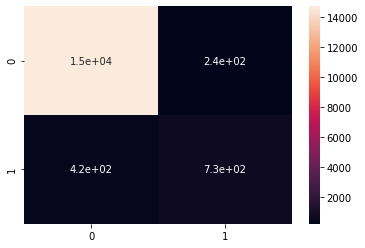

In [58]:
import seaborn as sns
sns.heatmap(cm,annot=True)